In [1]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from keras.layers import Dense
from keras.layers import Conv2D
from keras.datasets import mnist
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import MaxPool2D
from keras.models import Sequential


In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Unpack the iris dataset, from UCI Machine Learning Repository
iris = datasets.load_iris()
X = iris['data']
y = iris['target']
# Preprocess data
X = StandardScaler().fit_transform(X)
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
#loading data
(X_train,y_train) , (X_test,y_test)=mnist.load_data()
#reshaping data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))
#checking the shape after reshaping
print(X_train.shape)
print(X_test.shape)
#normalizing the pixel values
X_train=X_train/255
X_test=X_test/255

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
#x_train_flattened = X_train.reshape(len(X_train), 28*28)
#x_test_flattened = X_test.reshape(len(X_test), 28*28)

In [5]:
# Sequential create a stack of layers
model = keras.Sequential()
model.add(Flatten())

model.add(Dense(10, input_shape=(784,), activation='sigmoid'))
model.add(Dense(200, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='sigmoid'))

# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Does the training
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.5112 - accuracy: 0.8378
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2359 - accuracy: 0.9273
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1953 - accuracy: 0.9388
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1741 - accuracy: 0.9456
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1608 - accuracy: 0.9493


In [6]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1761 - accuracy: 0.9444


[0.176077738404274, 0.9444000124931335]

In [7]:
y_predicted = model.predict(X_test)
y_predicted[0]
np.argmax(y_predicted[0])
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)


313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

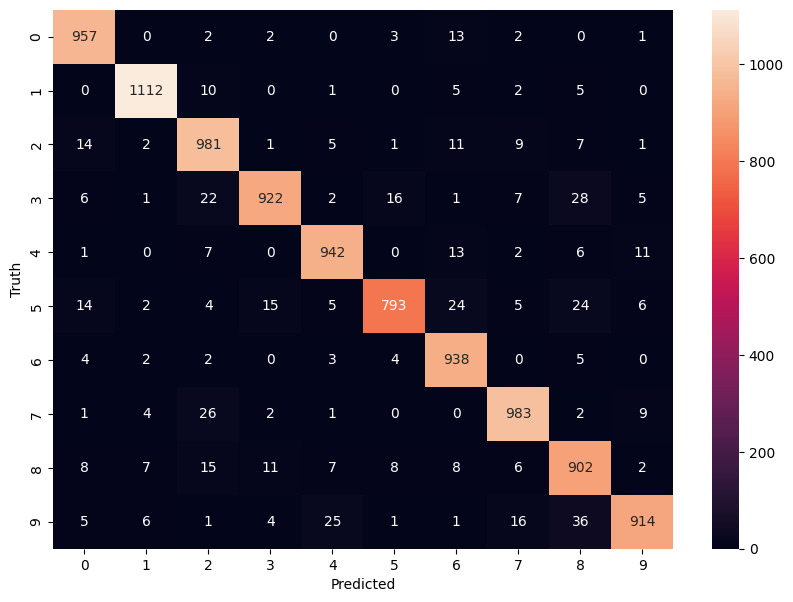

In [8]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')